<h1>FLIGHT DEALY PREDICTION MODEL

#import all required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
flight=pd.read_csv(r"C:\Users\userp\OneDrive\Desktop\flights.csv")

C:\Users\userp\AppData\Local\Temp\ipykernel_14800\2942904775.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flight=pd.read_csv(r"C:\Users\userp\OneDrive\Desktop\flights.csv")


In [3]:
flight=flight.sample(n=100000)
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4866327,2015,10,31,6,F9,1248,N210FR,14771,13930,1245,...,1853.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4014827,2015,9,7,1,VX,161,N851VA,EWR,LAX,905,...,1139.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1719615,2015,4,20,1,US,2041,N738US,DCA,CLT,1525,...,2043.0,228.0,0,0,NaN,228.0,0.0,0.0,0.0,0.0
2734471,2015,6,21,7,OO,4666,N187PQ,LAX,OAK,1850,...,1958.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
566934,2015,2,7,6,NK,147,N622NK,ACY,MCO,1120,...,1329.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flight.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1697241,2015,4,19,7,WN,786,N611SW,SJC,LAX,950,...,1120.0,15.0,0,0,NaN,0.0,0.0,15.0,0.0,0.0
2189411,2015,5,19,2,EV,4867,N13997,BTR,IAH,1604,...,1745.0,25.0,0,0,NaN,4.0,0.0,0.0,21.0,0.0
507662,2015,2,3,2,WN,827,N225WN,DEN,JAX,1355,...,1850.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3158269,2015,7,17,5,WN,1496,N903WN,BOS,STL,725,...,1059.0,89.0,0,0,NaN,0.0,0.0,89.0,0.0,0.0
4903121,2015,11,2,1,DL,2780,N970AT,LAX,SFO,2100,...,2211.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flight.shape

(100000, 31)

In [6]:
flight.isnull().values.any()

True

In [7]:
#checking how many null values are there in each columns
flight.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              261
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1533
DEPARTURE_DELAY         1533
TAXI_OUT                1597
WHEELS_OFF              1597
SCHEDULED_TIME             1
ELAPSED_TIME            1842
AIR_TIME                1842
DISTANCE                   0
WHEELS_ON               1647
TAXI_IN                 1647
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1647
ARRIVAL_DELAY           1842
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98394
AIR_SYSTEM_DELAY       81610
SECURITY_DELAY         81610
AIRLINE_DELAY          81610
LATE_AIRCRAFT_DELAY    81610
WEATHER_DELAY          81610
dtype: int64

<AxesSubplot:xlabel='CANCELLATION_REASON', ylabel='count'>

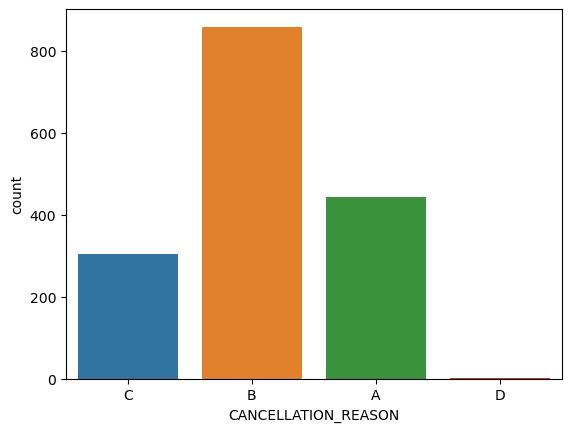

In [8]:
sns.countplot(x='CANCELLATION_REASON',data=flight)

reason for cancellation of flight:  A-Airline/carrier ,B-Weather,c-National air system 
we observe from graph easily that mostly weather is responsible for dealyof flight

<AxesSubplot:xlabel='MONTH', ylabel='count'>

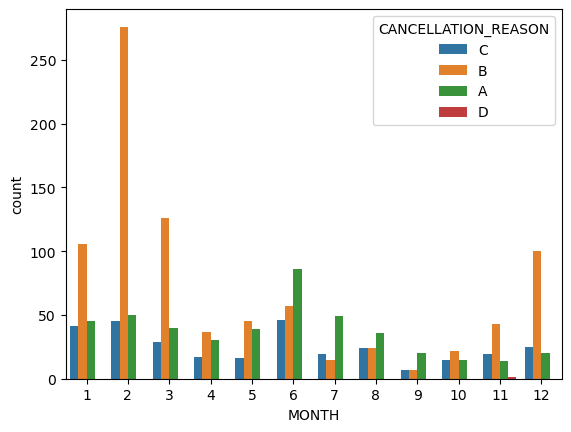

In [9]:
sns.countplot(x="MONTH",hue='CANCELLATION_REASON',data=flight)

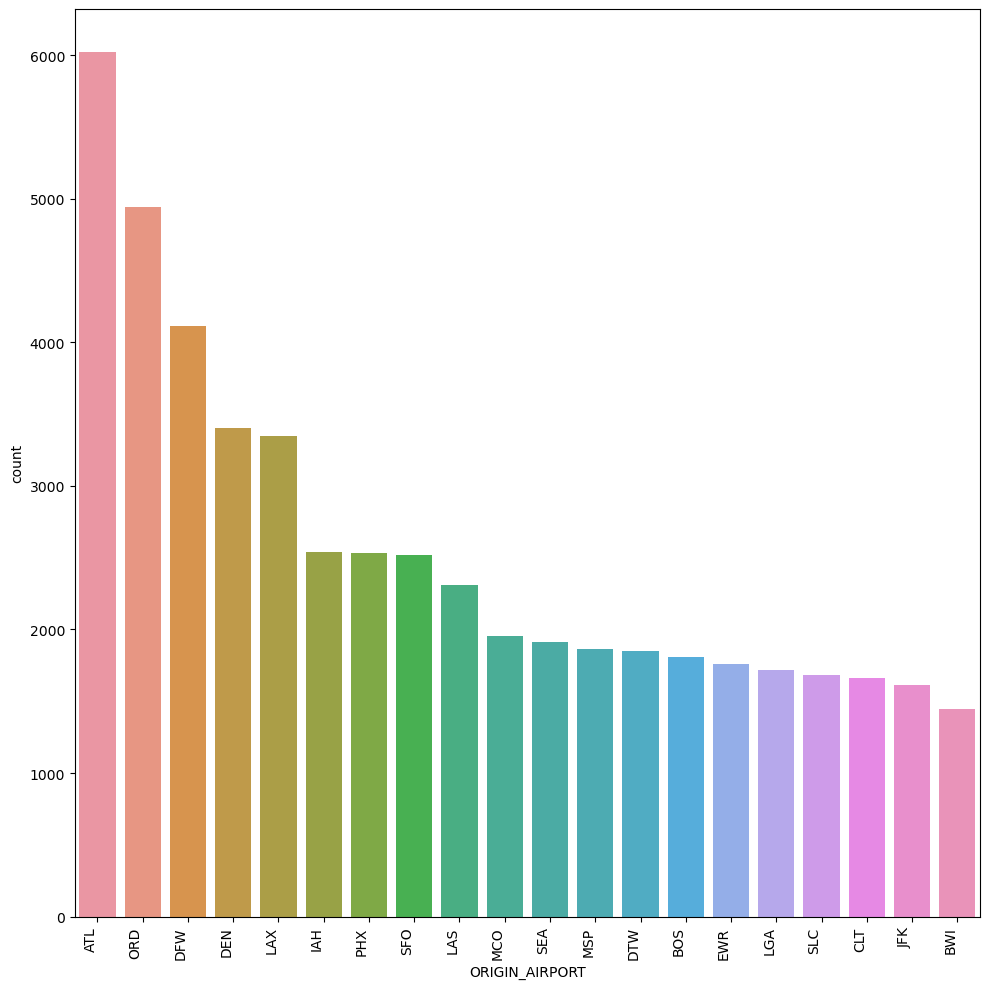

In [10]:
plt.figure(figsize=(10,10))
axis=sns.countplot(x=flight['ORIGIN_AIRPORT'],data=flight,order=flight['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(),rotation=90,ha="right")
plt.tight_layout()
plt.show()

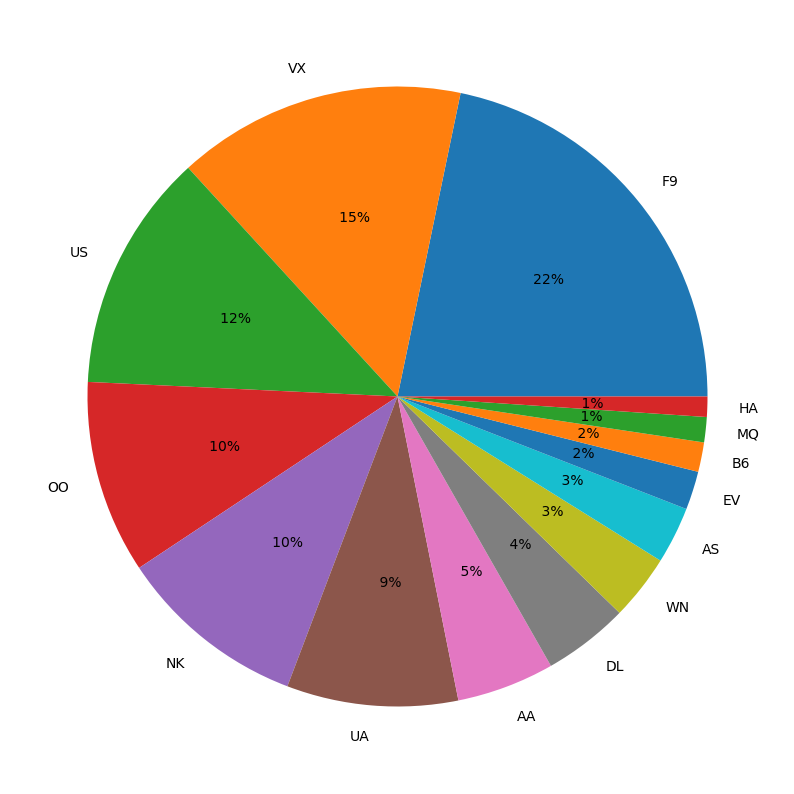

In [11]:
axis=plt.subplots(figsize=(10,14))
Name=flight["AIRLINE"].unique()
size=flight["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

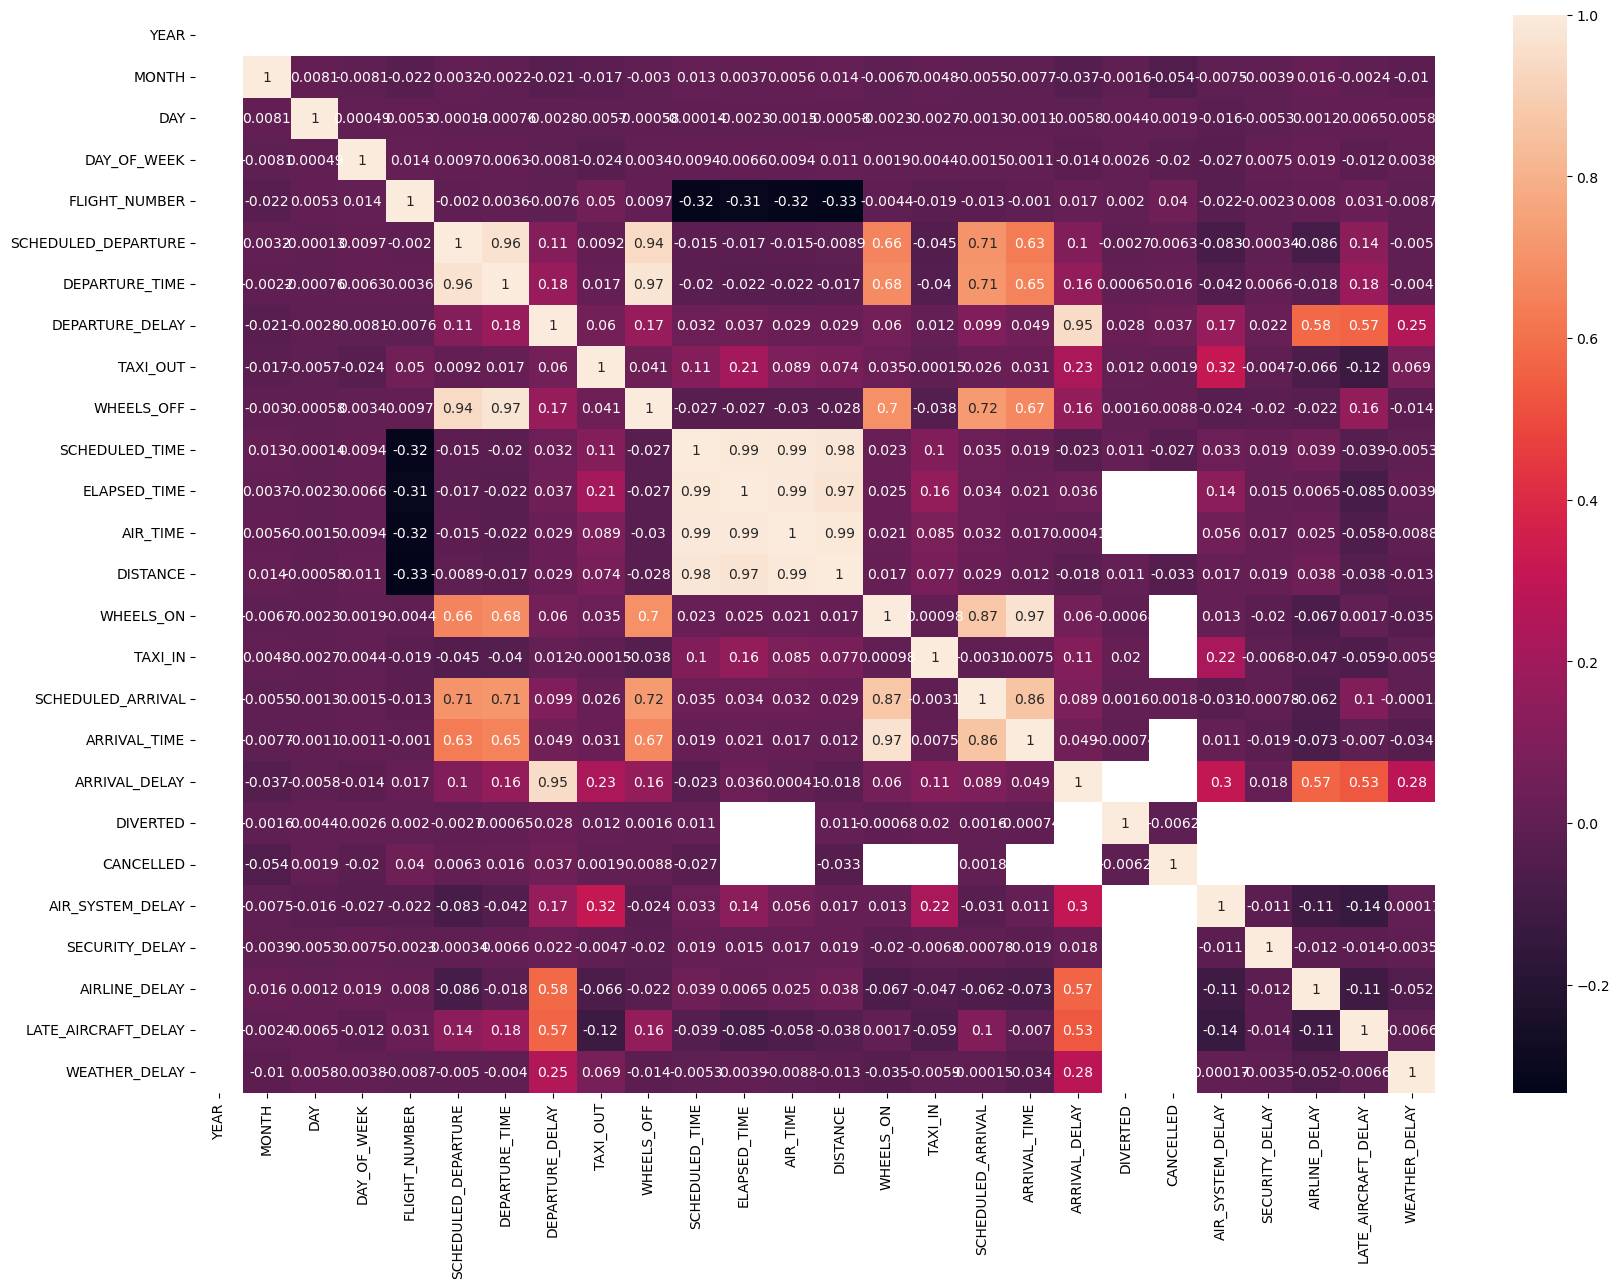

In [12]:
axis=plt.subplots(figsize=(20,14))
sns.heatmap(flight.corr(),annot=True)
plt.show()

very high correlation between arrival and departure dealy
<br> it  shows that maximum of the arriavl dealy are due to the depature dealys

In [13]:
corr=flight.corr()
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008102,-0.008071,-0.021564,0.003221,-0.002233,-0.021416,-0.016757,-0.003038,...,-0.005529,-0.007655,-0.037086,-0.001600,-0.053947,-0.007537,-0.003939,0.015856,-0.002396,-0.010491
DAY,NaN,0.008102,1.000000,0.000486,0.005348,-0.000128,-0.000761,-0.002826,-0.005737,-0.000576,...,-0.001285,-0.001074,-0.005801,0.004445,0.001884,-0.015953,-0.005321,0.001173,0.006508,0.005827
DAY_OF_WEEK,NaN,-0.008071,0.000486,1.000000,0.014203,0.009670,0.006350,-0.008137,-0.024163,0.003438,...,0.001499,0.001059,-0.013709,0.002622,-0.019503,-0.027114,0.007530,0.018510,-0.012127,0.003786
FLIGHT_NUMBER,NaN,-0.021564,0.005348,0.014203,1.000000,-0.001982,0.003574,-0.007551,0.049975,0.009694,...,-0.013427,-0.001037,0.017451,0.002008,0.039862,-0.021829,-0.002301,0.007979,0.030570,-0.008745
SCHEDULED_DEPARTURE,NaN,0.003221,-0.000128,0.009670,-0.001982,1.000000,0.963756,0.111946,0.009180,0.939506,...,0.707045,0.632868,0.099695,-0.002665,0.006309,-0.083266,-0.000339,-0.086031,0.139125,-0.005038
DEPARTURE_TIME,NaN,-0.002233,-0.000761,0.006350,0.003574,0.963756,1.000000,0.176200,0.016608,0.974171,...,0.712409,0.651288,0.161064,0.000646,0.016051,-0.042141,0.006590,-0.017873,0.178168,-0.004047
DEPARTURE_DELAY,NaN,-0.021416,-0.002826,-0.008137,-0.007551,0.111946,0.176200,1.000000,0.060220,0.168312,...,0.098547,0.049287,0.945892,0.028194,0.037307,0.167109,0.021791,0.578792,0.565341,0.254157
TAXI_OUT,NaN,-0.016757,-0.005737,-0.024163,0.049975,0.009180,0.016608,0.060220,1.000000,0.040832,...,0.025634,0.030864,0.226346,0.012408,0.001892,0.317135,-0.004735,-0.065743,-0.121334,0.069209
WHEELS_OFF,NaN,-0.003038,-0.000576,0.003438,0.009694,0.939506,0.974171,0.168312,0.040832,1.000000,...,0.723987,0.668974,0.158855,0.001591,0.008760,-0.024410,-0.020381,-0.022184,0.157499,-0.013899


In [14]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flight.drop(variables_to_remove,axis=1,inplace= True)
flight.columns
     

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [15]:
airport = pd.read_csv(r'C:\Users\userp\OneDrive\Desktop\airports.csv')
airport
     

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [16]:
flight.loc[~flight.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flight.loc[~flight.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flight

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4866327,10,31,6,F9,OTHER,OTHER,1245,-5.0,1846,3.0
4014827,9,7,1,VX,EWR,LAX,905,0.0,2454,-21.0
1719615,4,20,1,US,DCA,CLT,1525,213.0,331,228.0
2734471,6,21,7,OO,LAX,OAK,1850,-3.0,337,-14.0
566934,2,7,6,NK,ACY,MCO,1120,-9.0,852,-19.0
...,...,...,...,...,...,...,...,...,...,...
1697241,4,19,7,WN,SJC,LAX,950,17.0,308,15.0
2189411,5,19,2,EV,BTR,IAH,1604,21.0,253,25.0
507662,2,3,2,WN,DEN,JAX,1355,2.0,1447,-10.0
3158269,7,17,5,WN,BOS,STL,725,108.0,1047,89.0


In [17]:
print(flight.ORIGIN_AIRPORT.nunique())
print(flight.DESTINATION_AIRPORT.nunique())
print(flight.AIRLINE.nunique())

318
318
14


In [18]:
flight=flight.dropna()
flight

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4866327,10,31,6,F9,OTHER,OTHER,1245,-5.0,1846,3.0
4014827,9,7,1,VX,EWR,LAX,905,0.0,2454,-21.0
1719615,4,20,1,US,DCA,CLT,1525,213.0,331,228.0
2734471,6,21,7,OO,LAX,OAK,1850,-3.0,337,-14.0
566934,2,7,6,NK,ACY,MCO,1120,-9.0,852,-19.0
...,...,...,...,...,...,...,...,...,...,...
1697241,4,19,7,WN,SJC,LAX,950,17.0,308,15.0
2189411,5,19,2,EV,BTR,IAH,1604,21.0,253,25.0
507662,2,3,2,WN,DEN,JAX,1355,2.0,1447,-10.0
3158269,7,17,5,WN,BOS,STL,725,108.0,1047,89.0


In [19]:
flight.shape

(98158, 10)

In [20]:
df=pd.DataFrame(flight)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flight
     

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4866327,10,31,FRIDAY,F9,OTHER,OTHER,1245,-5.0,1846,3.0
4014827,9,7,SUNDAY,VX,EWR,LAX,905,0.0,2454,-21.0
1719615,4,20,SUNDAY,US,DCA,CLT,1525,213.0,331,228.0
2734471,6,21,SATURDAY,OO,LAX,OAK,1850,-3.0,337,-14.0
566934,2,7,FRIDAY,NK,ACY,MCO,1120,-9.0,852,-19.0
...,...,...,...,...,...,...,...,...,...,...
1697241,4,19,SATURDAY,WN,SJC,LAX,950,17.0,308,15.0
2189411,5,19,MONDAY,EV,BTR,IAH,1604,21.0,253,25.0
507662,2,3,MONDAY,WN,DEN,JAX,1355,2.0,1447,-10.0
3158269,7,17,THURSDAY,WN,BOS,STL,725,108.0,1047,89.0


In [21]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4866327,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4014827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1719615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2734471,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
566934,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2189411,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
507662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3158269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=653)

In [23]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [24]:
flight.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [25]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4866327,10,31,1245,-5.0,1846,3.0
4014827,9,7,905,0.0,2454,-21.0
1719615,4,20,1525,213.0,331,228.0
2734471,6,21,1850,-3.0,337,-14.0
566934,2,7,1120,-9.0,852,-19.0
...,...,...,...,...,...,...
1697241,4,19,950,17.0,308,15.0
2189411,5,19,1604,21.0,253,25.0
507662,2,3,1355,2.0,1447,-10.0
3158269,7,17,725,108.0,1047,89.0


In [26]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4866327,10,31,1245,-5.0,1846,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4014827,9,7,905,0.0,2454,-21.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1719615,4,20,1525,213.0,331,228.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2734471,6,21,1850,-3.0,337,-14.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
566934,2,7,1120,-9.0,852,-19.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697241,4,19,950,17.0,308,15.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2189411,5,19,1604,21.0,253,25.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
507662,2,3,1355,2.0,1447,-10.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3158269,7,17,725,108.0,1047,89.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
data.shape

(98158, 659)

In [28]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4499380,10,8,805,9.0,1195,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4943502,11,5,1210,-8.0,122,-12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1982842,5,6,1949,-9.0,1008,-18.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1663363,4,17,555,1.0,591,-6.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
563620,2,7,725,-4.0,1407,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860073,2,26,1151,-2.0,247,-6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1923688,5,3,1030,-3.0,928,-19.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1628225,4,14,2030,-12.0,419,-18.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1776141,4,24,545,-5.0,284,-15.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [29]:

final_data.shape

(60000, 659)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [32]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4499380,10,8,805,1195,6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4943502,11,5,1210,122,-12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1982842,5,6,1949,1008,-18.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1663363,4,17,555,591,-6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
563620,2,7,725,1407,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860073,2,26,1151,247,-6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1923688,5,3,1030,928,-19.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1628225,4,14,2030,419,-18.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1776141,4,24,545,284,-15.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
Y

4499380     9.0
4943502    -8.0
1982842    -9.0
1663363     1.0
563620     -4.0
           ... 
860073     -2.0
1923688    -3.0
1628225   -12.0
1776141    -5.0
1057798     0.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestRegressor
reg_rf =RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
y_pred = reg_rf.predict(X_test)

In [40]:
reg_rf.score(X_train,y_train)

0.9894704128758982

In [41]:
reg_rf.score(X_test,y_test)

0.9358754341549755

In [42]:
metrics.r2_score(y_test,y_pred)

0.9358754341549755

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 5.926775833333333
MSE: 92.59673145833334
RMSE: 9.622719545862974


In [44]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
3919238,-6.0,16.67
1376539,-5.0,-2.13
1514665,0.0,-0.47
2056591,-5.0,-7.36
1065713,18.0,11.98
...,...,...
1885491,96.0,91.62
2251761,-3.0,-1.74
5356806,-1.0,-6.17
3493343,4.0,3.48


In [45]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
     

In [46]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
     

In [47]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [48]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   8.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   8.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
rf_random.best_params_

{'n_estimators': 113,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [50]:
p=rf_random.predict(X_test)

In [51]:
metrics.r2_score(y_test,p)

0.9340313090504434

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 5.911393812533874
MSE: 95.25967279492845
RMSE: 9.760106187687121


In [53]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
3919238,-6.0,13.210072
1376539,-5.0,-3.402368
1514665,0.0,0.261268
2056591,-5.0,-6.229466
1065713,18.0,12.644076
...,...,...
1885491,96.0,90.568774
2251761,-3.0,-1.717908
5356806,-1.0,-6.310306
3493343,4.0,4.633732


In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [55]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)
     

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 5.8745575216122745
MSE: 91.79143097570143
RMSE: 9.580784465569687


In [57]:
metrics.r2_score(y_test,pre)

0.9364331163000176

In [58]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
3919238,-6.0,10.357846
1376539,-5.0,-4.220193
1514665,0.0,3.193952
2056591,-5.0,-4.921289
1065713,18.0,10.740827
...,...,...
1885491,96.0,86.768238
2251761,-3.0,-2.165943
5356806,-1.0,-6.246496
3493343,4.0,5.220680


In [59]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]

In [60]:
res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res

C:\Users\userp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-4.0287314334602

In [61]:
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")
     
    

Flight is not delayed
